In [1]:
import os, os.path, shutil
import zipfile
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# 압축을 풀어주는 코드

local_zip = './data/dogs-vs-cats.zip'   ##### 집파일 인식
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data')
zip_ref.close()

In [3]:
local_zip = './data/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data/')
zip_ref.close()

In [4]:
local_zip = './data/test1.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data/')
zip_ref.close()

# 사진 선별하기

In [5]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = './data/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './data/cats_and_dogs_small'
#os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

In [6]:
# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


# 하나의 변수에 사진 집어넣기

In [8]:
#이미지 전처리용 라이브러리
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 0~255 > 0~1 까지로 변환 
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)

#flow_from_directory() 해당 폴더의 데이터를 전처리
#(폴더경로, 변경할 이미지 크기, 한번에 변경할 개수, 라벨링 모드)
# 라벨링 모드 : categorical, binary       ##### 주로 카테고리컬을 많이 쓰게 될 것이다.
#####바이너리,  카테고리컬 ,???   3가지가 있다고한다
train_generator=train_datagen.flow_from_directory(
                train_dir,
                target_size=(150,150),  # 150 *150으로 이미지 크기 변경
                batch_size=20, # 한번에 20개씩 전처리
                class_mode='categorical'
)

val_generator=val_datagen.flow_from_directory(
                validation_dir,
                target_size=(150,150),  # 150 *150으로 이미지 크기 변경
                batch_size=20, # 한번에 20개씩 전처리
                class_mode='categorical'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
#할당된 정답 확인  ##### 알파벳순으로 라벨이 달리게 된다
train_generator.class_indices

{'cats': 0, 'dogs': 1}

# 전이학습
- 이미 만들어진 모델 가져와서 사용하기 

In [10]:
# VGG16 다운로드 - 전이학습 모델   ##### 빠르고 정확하게 가 모델들의 목적이다.  목적이 달성되면 이름이 붙게된다
from tensorflow.keras.applications import VGG16

#특징 추출부만 가져오기
conv_base=VGG16(weights='imagenet',#개/고양이 분류 모델의 가중치 가져오기 
                include_top=False, #분류기는 제외하고 가져오겠다
                input_shape=(150,150,3)
               )   

In [11]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

# 모델 설계

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential() ##### 모델을 생성해야한다 

model.add(conv_base) #특징추출부 더하기           #### 층을 추가한다. 층을 쌓는다

model.add(Flatten() ) # 특징추출부와 분류부를 이어주는 층 더하기

#분류부 설계
model.add(Dense(units=256, activation='relu')  )
model.add(Dense(units=2, activation='softmax')  )  ##### 1층을 더 쌓았다
#액티베이션 방법  sigmoid, linear, relu, softmax 등 등


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 16,812,610
Trainable params: 16,812,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 전이학습
# 모델의 구조, 모델의 가중치 를 가져오게된다
# 동결 - 모델의 가중치가 수정되는 것을 막음.   #####  막지 않으면 전이학습을 한 의미가 사라지게 되서 작업이 중요하다

In [15]:
# 하나의 층마다 학습되는 가중치는 2개(w,b)  웨이트와 바이어스 
print(len (model.trainable_weights ) )   #학습되는 가중치수
conv_base.trainable=False   # 동결
print(len (model.trainable_weights ) )   ##### 4가 나오면 정상이다 학습이 가능한 층이 2개니까 2+2 4  학습이 가능한 총 층이 15층이라서 동결하지 않으면 30이 나온다

30
4


# 컴파일
- 학습 환경 설정
- loss, optimizer, metrics

- loss : 결과에 대한 오차 
- optimizer : 어떻게 오차를 줄여나갈 것인지.   오차를 줄일 방법
    - SGD, momentum, rmsprop, adam, nadam 등등
- metrics : 결과를 표시할 방법              #~  정확도 정밀도  재현율  등등 다양하다 

In [16]:
model.compile(loss='categorical_crossentropy',
             optimizer= 'rmsprop',  # rmsprop, adam
             metrics=['accuracy'])  # 분류: accuracy ,  회귀 : mean_squared_error

# 학습 

In [17]:
history= model.fit(train_generator, # 학습데이터
                  steps_per_epoch=100, # 100개단위로 학습하라
                  epochs=5, # 학습할 횟수
                   validation_data=val_generator,
                   validation_steps=50,
                   verbose=2  # 학습과정 확인
                  )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/5
100/100 - 111s - loss: 0.9086 - accuracy: 0.7505 - val_loss: 0.4323 - val_accuracy: 0.7920
Epoch 2/5
100/100 - 109s - loss: 0.3436 - accuracy: 0.8555 - val_loss: 0.2804 - val_accuracy: 0.8940
Epoch 3/5
100/100 - 104s - loss: 0.2615 - accuracy: 0.9010 - val_loss: 0.6797 - val_accuracy: 0.7420
Epoch 4/5
100/100 - 106s - loss: 0.2314 - accuracy: 0.9135 - val_loss: 0.3467 - val_accuracy: 0.8830
Epoch 5/5
100/100 - 102s - loss: 0.2020 - accuracy: 0.9205 - val_loss: 0.2919 - val_accuracy: 0.9090


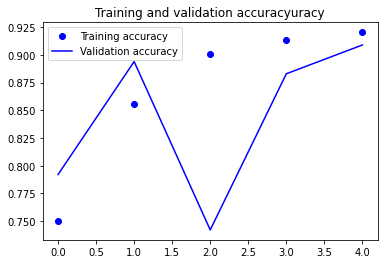

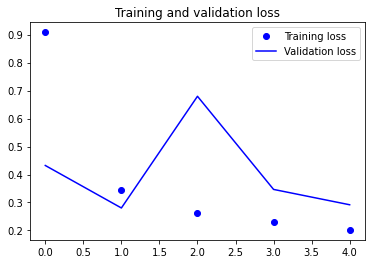

In [18]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracyuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 결과확인

In [19]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [20]:
test_loss, test_acc=model.evaluate_generator(test_generator, steps=50)
test_prediction= model.predict_generator(test_generator,steps=50)

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
Instructions for updating:
Please use Model.predict, which supports generators.


In [21]:
print(test_acc)
print(test_loss)

0.882
0.3058461622148752


In [22]:
test_prediction  ##### 가지고 있는 의미 : 2개가 한쌍. 앞이 고양이 확률 뒤가 강아지 확률
#test_prediction.shape

array([[9.9990642e-01, 9.3612172e-05],
       [7.4362457e-02, 9.2563754e-01],
       [4.2394777e-09, 1.0000000e+00],
       ...,
       [9.9100751e-01, 8.9924708e-03],
       [9.9778050e-01, 2.2194814e-03],
       [1.0245850e-03, 9.9897540e-01]], dtype=float32)

In [23]:
import numpy as np

prediction = np.where(test_prediction > .5, "O", "X")

for i in range(20):
  print(val_generator.filenames[i])
  print(prediction[i])

cats\cat.1000.jpg
['O' 'X']
cats\cat.1001.jpg
['X' 'O']
cats\cat.1002.jpg
['X' 'O']
cats\cat.1003.jpg
['O' 'X']
cats\cat.1004.jpg
['O' 'X']
cats\cat.1005.jpg
['O' 'X']
cats\cat.1006.jpg
['O' 'X']
cats\cat.1007.jpg
['O' 'X']
cats\cat.1008.jpg
['O' 'X']
cats\cat.1009.jpg
['O' 'X']
cats\cat.1010.jpg
['O' 'X']
cats\cat.1011.jpg
['O' 'X']
cats\cat.1012.jpg
['O' 'X']
cats\cat.1013.jpg
['X' 'O']
cats\cat.1014.jpg
['X' 'O']
cats\cat.1015.jpg
['X' 'O']
cats\cat.1016.jpg
['X' 'O']
cats\cat.1017.jpg
['X' 'O']
cats\cat.1018.jpg
['X' 'O']
cats\cat.1019.jpg
['X' 'O']


# 데이터 증식
- data argmentation
- 장점 : 거의 성능은 좋아짐
- 단점 : 데이터를 증강하는 패턴이 정해져있음
        - 장점이 더 크기 때문에 시간이 충분히 주어진다면 증식시키는 것이 좋다
- 훈련데이터만 증식

In [24]:
# 훈련데이터만 증식
train_gen = ImageDataGenerator (
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = "nearest"    ##### 가까이 있는 데이터로 빈 곳을 채우겠다는 뜻.  회전 등의 과정에서 생기는 빈칸
)

In [25]:
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (150,150), # 150*150으로 이미지 크기 변경
                    batch_size = 20, # 한번에 20개씩 전처리
                    class_mode = 'categorical' # 원핫인코딩 진행
)

Found 2000 images belonging to 2 classes.


In [26]:
# VGG16 다운로드 - 전이학습 모델
from tensorflow.keras.applications import VGG16

# 특징 추출부만 가져오기
conv_base = VGG16(weights = 'imagenet',# 개/고양이 분류 모델의 가중치 가져오기
                  include_top = False, # 분류기는 제외하고 가져오겠다
                  input_shape = (150,150,3)                  
                 )

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()

model.add(conv_base) # 특징추출부 더하기

model.add(Flatten()) # 특징추출부와 분류부를 이어주는 층 더하기

# 분류부 설계
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))

# 하나의 층마다 학습되는 가중치는 2개(w,b)
print(len(model.trainable_weights))# 학습되는 가중치수
conv_base.trainable = False # 동결
print(len(model.trainable_weights))

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'rmsprop', # rmsprop, adam
             metrics = ['accuracy']) # 분류 : accuracy, 회귀 : mean_squeard_error

history = model.fit(train_generator,# 학습 데이터
                    steps_per_epoch = 100, # 100개 단위로 학습
                    epochs = 5, # 학습할 횟수
                    validation_data = val_generator,
                    validation_steps = 50,
                    verbose = 2 # 학습 과정 확인
                   )

30
4
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/5
100/100 - 102s - loss: 0.8257 - accuracy: 0.7675 - val_loss: 0.4664 - val_accuracy: 0.7980
Epoch 2/5
100/100 - 107s - loss: 0.3775 - accuracy: 0.8540 - val_loss: 0.3228 - val_accuracy: 0.8740
Epoch 3/5
100/100 - 109s - loss: 0.2636 - accuracy: 0.8970 - val_loss: 0.5105 - val_accuracy: 0.7830
Epoch 4/5
100/100 - 107s - loss: 0.2351 - accuracy: 0.8995 - val_loss: 0.2715 - val_accuracy: 0.9040
Epoch 5/5
100/100 - 104s - loss: 0.1483 - accuracy: 0.9410 - val_loss: 0.2967 - val_accuracy: 0.9080


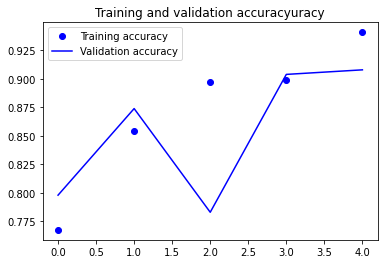

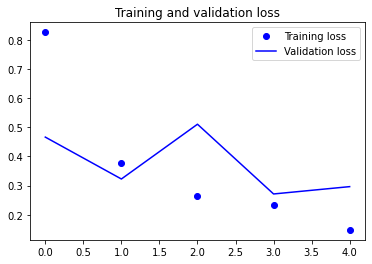

In [27]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracyuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 전이학습 - 미세조정

In [34]:
# VGG16 다운로드 - 전이학습 모델
from tensorflow.keras.applications import VGG16

# 특징 추출부만 가져오기
conv_base = VGG16(weights = 'imagenet',# 개/고양이 분류 모델의 가중치 가져오기
                  include_top = False, # 분류기는 제외하고 가져오겠다
                  input_shape = (150,150,3)                  
                 )

ERROR! Session/line number was not unique in database. History logging moved to new session 240


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

ERROR! Session/line number was not unique in database. History logging moved to new session 241


In [36]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu') )
model.add(Dense(2,activation='softmax') )

model.summary()

ERROR! Session/line number was not unique in database. History logging moved to new session 242
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 514       
Total params: 16,812,610
Trainable params: 16,812,610
Non-trainable params: 0
_________________________________________________________________


In [37]:
# 특성추출부의 하위 3개층을 학습 가능하도록 만들어보자 
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [38]:
print(len(model.trainable_weights))

30


In [39]:
# 일단 전체 층을 학습하도록 만듦
conv_base.trainable=True

set_trainable=False
#block5_conv1부터 학습이 가능하게 만듦
for layer in conv_base.layers:
    if layer.name=='block5_conv1':
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False       


In [40]:
print(len(model.trainable_weights))

10


In [41]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=val_generator,
      validation_steps=50,
      verbose=2)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 100 steps, validate for 50 steps
Epoch 1/5
100/100 - 124s - loss: 3.8269 - accuracy: 0.4960 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
100/100 - 126s - loss: 0.6933 - accuracy: 0.4930 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
100/100 - 135s - loss: 0.6933 - accuracy: 0.4730 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
100/100 - 135s - loss: 0.6932 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
100/100 - 126s - loss: 0.6933 - accuracy: 0.4920 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
##### 잘 짜여있던 학습내용의 동결을 품 + epoch 의 숫자가 적어서 결과가 썩 좋지 않게 나온 것이다. 
##### epoch이 늘어난다면 성장할 가능성이 있다.